<a href="https://colab.research.google.com/github/Katla-Navyasree/Uber-Supply-Demand-Gaps/blob/main/Uber_Supply_Demand_Gap_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Uber Supply-Demand Gap Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Katla Navyasree
##### **Batch**           - July 15th Batch

# **Project Summary -**

This project focuses on analyzing the supply-demand gap in Uber ride requests using a real-world dataset. The goal is to identify when and where Uber fails to meet customer demand due to factors like trip cancellations and no cars available.

We used a combination of Excel, SQL, and Python (Pandas, Seaborn, Matplotlib) to clean, explore, and visualize the data. Key areas of analysis included:


*   Hourly demand trends
*   Location-based performance (City vs Airport)
*   Trip status patterns (Completed, Cancelled, No Cars Available)

Based on the insights gained, we proposed data-driven solutions to improve trip fulfillment, optimize driver allocation, and reduce customer dissatisfaction.

This multi-tool approach provided a complete view of Uber’s operational challenges and supports better decision-making for business growth.

# **GitHub Link -**

https://github.com/Katla-Navyasree/Uber-Supply-Demand-Gaps.git

# **Problem Statement**


Uber is facing a significant supply-demand imbalance, where a large number of ride requests are either cancelled by drivers or result in "No Cars Available" — especially during peak hours.

This results in:


*   Unmet customer demand
*   Lost revenue
*   Reduced service reliability

The objective of this project is to analyze Uber ride request data to:

*   Understand when and where these failures occur
*   Identify key patterns and bottlenecks
*   Provide actionable insights to optimize operations and reduce failure rates

By solving this problem, Uber can improve customer experience, driver efficiency, and business performance.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd        # for data manipulation
import numpy as np         # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns      # for advanced plotting
import datetime            # for working with date and time
import warnings
warnings.filterwarnings("ignore") # ignore all warnings

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/Uber Request Data.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(6745, 6)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


Text(0.5, 1.0, 'Visualizing the missing values in the dataset\n')

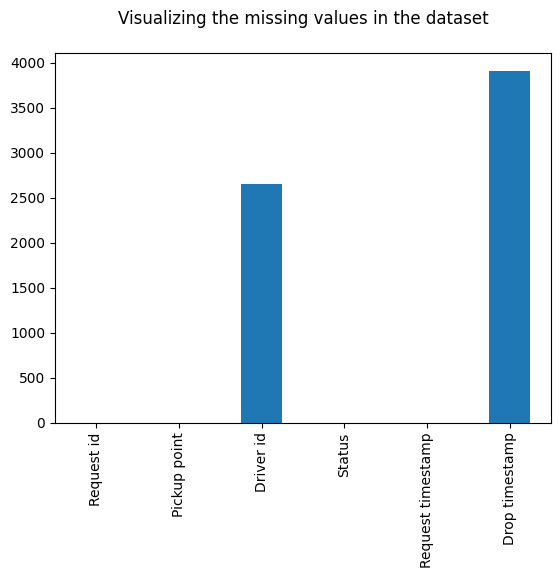

In [8]:
# Visualizing the missing values
df.isnull().sum().plot(kind='bar')
plt.title('Visualizing the missing values in the dataset\n')

### What did you know about your dataset?

The dataset contains the information about cab requests made to Uber in a City and Airport, along with their statuses, locations, and timestamps. Here's a breakdown of what I observed:
## **Dataset Overview**
##### **Total Entries:** 6,745 ride requests

### **Dataset has the following Attributes:**
##### **Request id:** Unique ID for each ride request
##### **Pickup point:** Either City or Airport
##### **Driver id:** Driver assigned to the ride
##### **Status:** Status of the ride: Trip Completed, Cancelled and No Cars Available
##### **Request timestamp:** Time when the request was made (date and time mixed format)
##### **Drop timestamp:** Time when the trip ended (only for completed trips)

#### **Missing Values Found in:**
##### **Driver id:** for unfulfilled requests (No Cars Available or Cancelled)
##### **Drop timestamp:** for all non-completed trips

##### Now let's clean our data before doing the analysis part
##### First let's drop all the null values present in Driver id as it is a unique value

In [9]:
#dropping the null values in Driver id column
df.dropna(subset=['Driver id'], inplace=True)
df.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,0
Status,0
Request timestamp,0
Drop timestamp,1264


Drop timestamp is only applicable for Trips which were completed and not for cancelled rides and no cars available so lets replace them with 0.

In [10]:
#replacing null values in Drop timestamps column with 0
df['Drop timestamp'].fillna(0, inplace=True)
df.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,0
Status,0
Request timestamp,0
Drop timestamp,0


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,Request id,Driver id
count,4095.000000,4095.000000
mean,3254.680342,149.501343
std,1946.691662,86.051994
min,1.000000,1.000000
25%,1600.500000,75.000000
50%,3196.000000,149.000000
75%,4813.500000,224.000000
max,6766.000000,300.000000


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

,0
Request id,4095
Pickup point,2
Driver id,300
Status,2
Request timestamp,2890
Drop timestamp,2283


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

#Load the dataset
df = pd.read_csv("Uber Request Data.csv")

# Convert timestamp columns to datetime (handles mixed formats)
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

df['Request Date'] = df['Request timestamp'].dt.date
df['Request Hour'] = df['Request timestamp'].dt.hour

df['Drop Date'] = df['Drop timestamp'].dt.date
df['Drop Hour'] = df['Drop timestamp'].dt.hour

#saving the cleaned dataset for further use
df.to_csv("Cleaned_Uber_Request_Data.csv", index=False)

print(" Data cleaning complete. Saved as 'Cleaned_Uber_Request_Data.csv'")
df.head()
df

 Data cleaning complete. Saved as 'Cleaned_Uber_Request_Data.csv'


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Drop Date,Drop Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,2016-07-11,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,2016-07-11,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,2016-07-12,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,2016-07-12,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,2016-07-13,8,2016-07-13,9.0
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT,2016-07-15,23,NaT,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT,2016-07-15,23,NaT,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT,2016-07-15,23,NaT,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT,2016-07-15,23,NaT,NaN


### What all manipulations have you done and insights you found?

As we can see the dataset is clean and ready for further analysis. The manipulations performed on given data are as follows,


1.   Loaded the raw dataset containing Uber ride request records.
2.   Converted both Request timestamp and Drop timestamp columns from strings (mixed format) to proper datetime objects using pandas.
3.   Created new columns for easier analysis:

    *   **Request Date:** Extracted the date from the request timestamp.
    *   **Request Hour:** Extracted the hour of the day (0-23 format for easier analysis) from the request timestamp.
    *   **Drop Date:** Extracted the date from the drop timestamp.
    *   **Drop Hour:** Extracted the hour of the day (0-23 format for easier analysis) from the drop timestamp.
4.   Saved the cleaned dataset to new CSV file (Cleaned_Uber_Request_Data.csv) for further use.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Data Visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

## **Univariate Analysis**

In [15]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Drop Date,Drop Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,2016-07-11,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,2016-07-11,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,2016-07-12,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,2016-07-12,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,2016-07-13,8,2016-07-13,9.0
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT,2016-07-15,23,NaT,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT,2016-07-15,23,NaT,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT,2016-07-15,23,NaT,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT,2016-07-15,23,NaT,NaN


## **BAR PLOT**

A bar plot is a type of chart that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.

#### **Bar plot of Distribution of Trip Status**

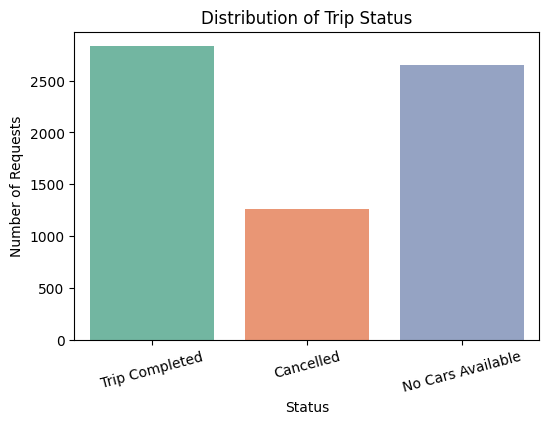

In [16]:
# Bar plot of Distribution of Trip Status
plt.figure(figsize=(6,4))
sns.countplot(x='Status', data=df, palette='Set2')
plt.title("Distribution of Trip Status")
plt.xlabel("Status")
plt.ylabel("Number of Requests")
plt.xticks(rotation=15)
plt.show()

##### 1. Why did you pick the specific chart?

##### This chart shows:

*   The total number of ride requests that were either completed, cancelled, or had no cars available.
*   It helps us understand how frequently rides are fulfilled vs. failed.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can observe that:


*   The number of cancelled trips and no cars available is significantly high compared to completed trips.
*   This indicates a major supply-demand gap and driver-side issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help in identifying:

*   How many requests are fulfilled, and how many aren't.
*   A large portion of rides are cancelled or not available, reflecting inefficient supply of Uber.
*   If this keeps happening, there is a chance for lower customer satisfaction and revenue;he  optimizing driver allocation can reverse this.

#### **Bar plot of Trip Completion by Hour**

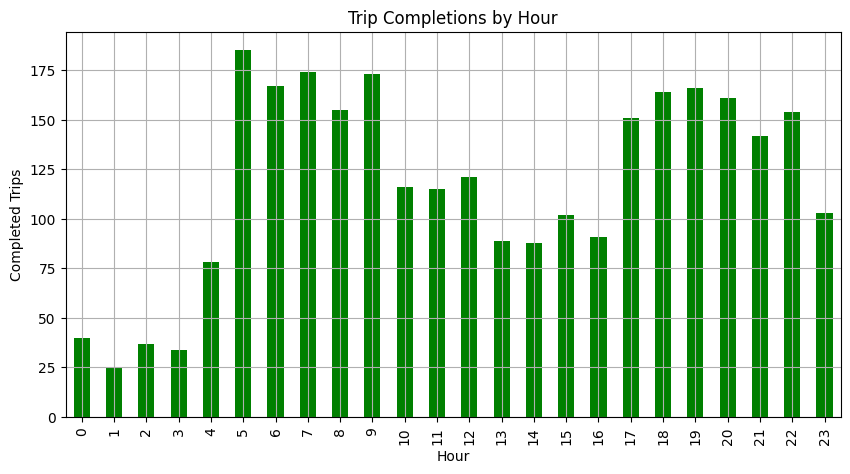

In [17]:
# Bar plot of Trip Completion by Hour
completed = df[df['Status'] == 'Trip Completed'].groupby('Request Hour').size()

plt.figure(figsize=(10,5))
completed.plot(kind='bar', color='green')
plt.title("Trip Completions by Hour")
plt.xlabel("Hour")
plt.ylabel("Completed Trips")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

This bar plot highlights the number of completed trips across each hour of the day.
It helps us identify the most active hours when Uber is successfully serving customers.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can observe that:
*   Most trip completions occur in the early morning and late evening hours.
This shows that off-peak times have better driver availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights helps in:

*   Shows when services are operating effectively (off-peak hour).
*   Demand peaks don't align with completion perks and leads to potential lost revenue.
*   Low completions during peak hours signal inadequate supply during high demand, which needs fixing.


#### **Bar plot of Total Requests by Hour of the Day**

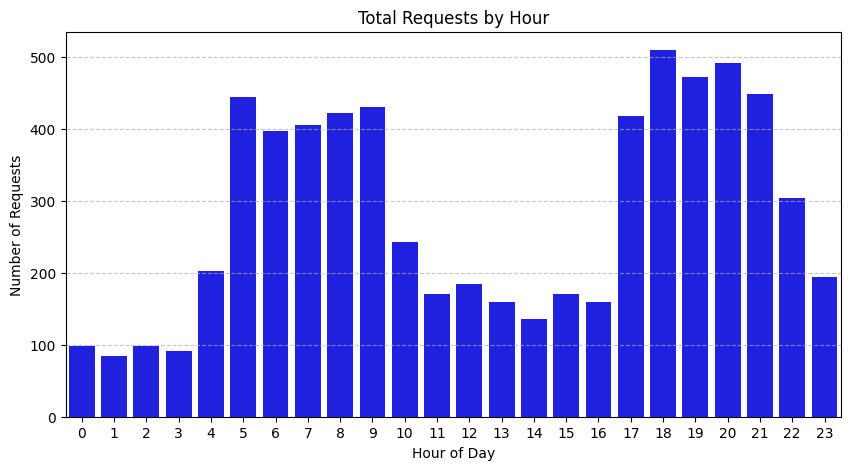

In [18]:
# Bar plot of Total Requests by Hour of the Day
plt.figure(figsize=(10,5))
sns.countplot(x='Request Hour', data=df, color='blue')
plt.title("Total Requests by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

This bar plot highlights the total number of requests by hour in a day. It helps us to identify when the customers are mostly active in a day looking for rides.

##### 2. What is/are the insight(s) found from the chart?

From the chart we can observe that:

*   Most ride requests occur during the morning (7–9 AM) and evening (5–9 PM).
*   This reflects commute and airport travel trends, helping Uber identify high-demand slots.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help in:

*   Aligning driver availability with peak demand.
*   Supports time based pricing models.


## **PIE CHART**

Pie chart is used to visualize the propositions of different categories within a dataset. It's circular statistical graph where each slice of the pie represents a category and the size of the slice is proportional to the category's contribution to the overall data.

#### **Pie chart of Pickup Point Share**

Just to visualize trip share between Airport and City.

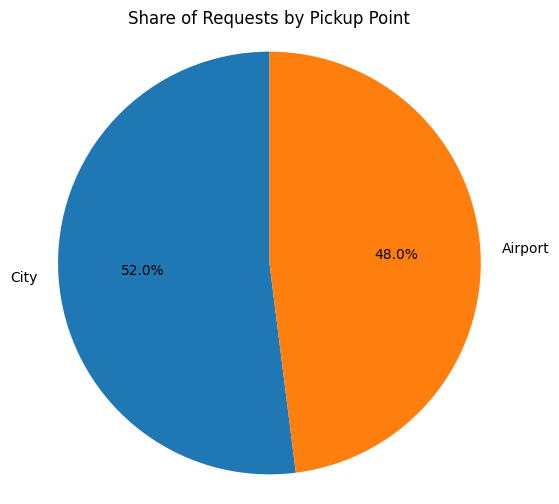

In [19]:
# Pie chart of Pickup Point Share
pickup_point_counts = df['Pickup point'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(pickup_point_counts, labels=pickup_point_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Share of Requests by Pickup Point")
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

##### The pie chart shows:
*   The share of requests originating from the City vs the Airport.
*   It helps visualize demand concentration between the two pickup zones.

##### 2. What is/are the insight(s) found from the chart?

##### From the chart we can observe that:

*   The majority of ride requests are from the City, not the Airport.
However, issues like "No Cars Available" may still be higher at specific pickup zones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help in:


*   Understanding demand zones (City or Airport) supports resource planning.
*   If the Airport gets ignored due to lower volume, but faces higher failure rate, it affects brand image.
*   Balanced supply is needed across zones, not just high-volume areas.

## **Bivariate Analysis**

#### **Hourly Ride Requests by Status**

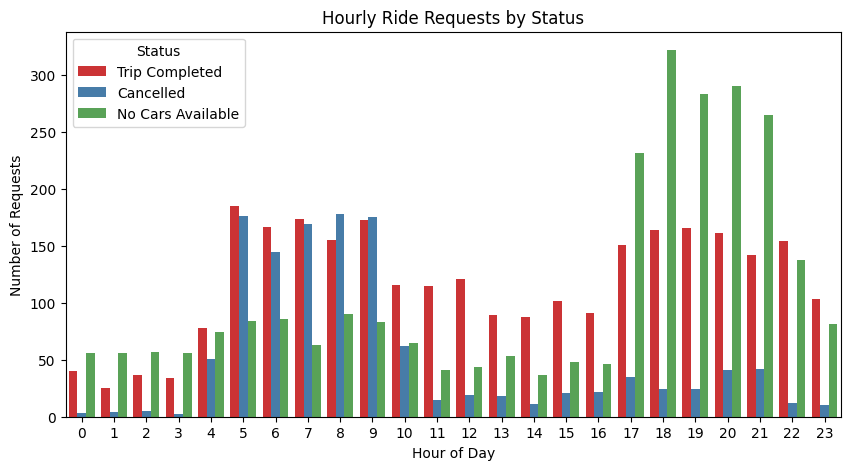

In [20]:
# Grouped bar chart on Hourly Ride Requests by Status
plt.figure(figsize=(10,5))
sns.countplot(x='Request Hour', data=df, hue='Status', palette='Set1')
plt.title("Hourly Ride Requests by Status")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.legend(title="Status")
plt.show()

##### 1. Why did you pick the specific chart?


*   This grouped bar chart compares request statuses (Completed, Cancelled, No Cars) across different hours.
*   It helps us spot patterns in failures and completions throughout the day.



##### 2. What is/are the insight(s) found from the chart?

From the chart we can observe that:
*   High demand occurs during rush hours (7–10 AM and 5–9 PM), but cancellations and no-car cases also peak during those times.
*   This reveals a critical supply shortage during peak hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights helps in:

*   Understanding that there should be the need for reallocation of drivers during peak hours.
*   Failure rates increase with demand — indicating lost business opportunities.
*   Peak hours should bring more revenue, not more unfulfilled requests.

#### **Pickup Point vs Trip Status**

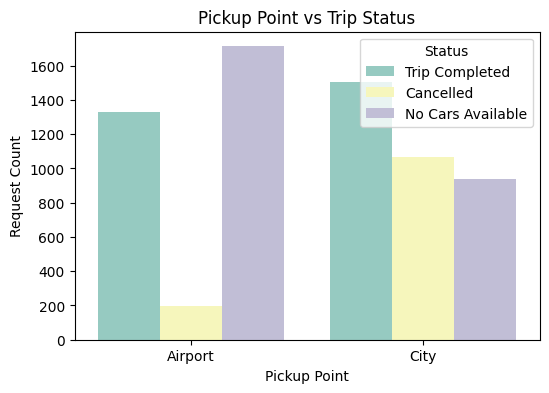

In [21]:
# Pickup Point vs Trip Status
plt.figure(figsize=(6,4))
sns.countplot(x='Pickup point', data=df, hue='Status', palette='Set3')
plt.title("Pickup Point vs Trip Status")
plt.xlabel("Pickup Point")
plt.ylabel("Request Count")
plt.legend(title="Status")
plt.show()

##### 1. Why did you pick the specific chart?



*   This chart compares trip statuses for each pickup point.
*   It reveals whether certain issues like cancellations are more common at the City or Airport.



##### 2. What is/are the insight(s) found from the chart?

From the chart we can observe that:


*   Airport requests face more “No Cars Available” issues, while City requests see more cancellations.
*   This suggests driver unavailability is a bigger issue at the Airport, while driver refusals are more common in the City.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights helps in:

*   Identifying location specific issues to resolve.
*   City has more cancellations; Airport has more no-car cases.
*   Each location needs a different intervention strategy — cancelling is behavioral, no-cars is supply-side.


#### **Cancellation Rate by Hour**

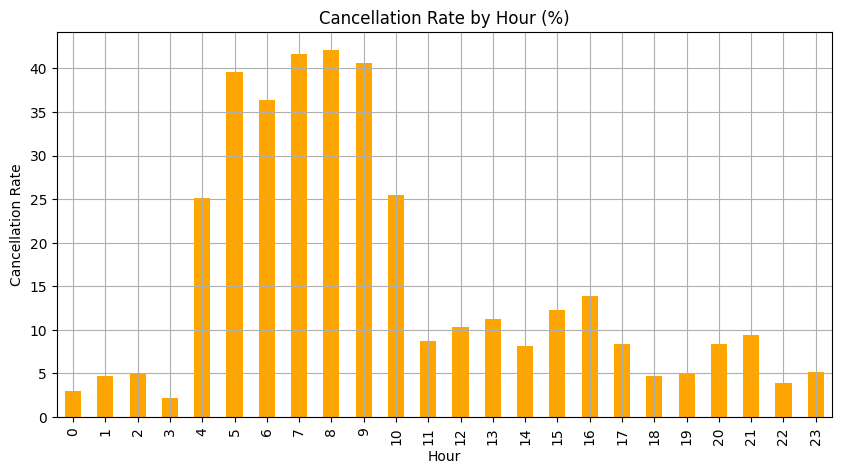

In [22]:
# Cancellation Rate by Hour
cancel_data = df[df['Status'] == 'Cancelled'].groupby('Request Hour').size()
total_data = df.groupby('Request Hour').size()
cancel_rate = (cancel_data / total_data) * 100

plt.figure(figsize=(10,5))
cancel_rate.plot(kind='bar', color='orange')
plt.title("Cancellation Rate by Hour (%)")
plt.xlabel("Hour")
plt.ylabel("Cancellation Rate")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?


*   This chart shows the percentage of cancelled rides per hour.
*   It identifies peak cancellation hours, helping to pinpoint driver-side problems or traffic patterns.



##### 2. What is/are the insight(s) found from the chart?

From this chart we observe that:

*   Cancellations peak around 5–9 PM, possibly due to drivers avoiding traffic or shift changes.
*   This hurts service quality during evening commute hours.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help in:

*   Actionable insight to train or incentivize drivers not to cancel.
*   Cancellation spikes in the evening suggest driver disengagement.
*   Evening failures impact office commuters and return trips — bad for loyalty.

#### **No Cars Available Rate by Hour**

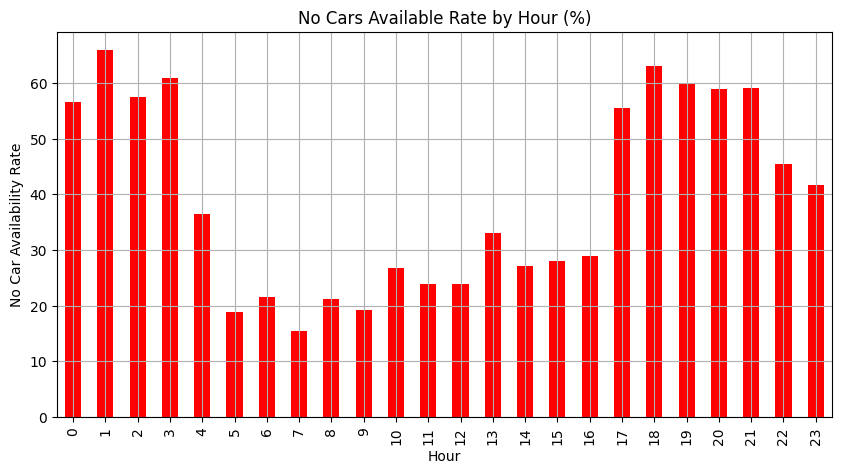

In [23]:
# No Cars Available Rate by Hour
no_cars_data = df[df['Status'] == 'No Cars Available'].groupby('Request Hour').size()
no_car_rate = (no_cars_data / total_data) * 100

plt.figure(figsize=(10,5))
no_car_rate.plot(kind='bar', color='red')
plt.title("No Cars Available Rate by Hour (%)")
plt.xlabel("Hour")
plt.ylabel("No Car Availability Rate")
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?


*   This plot shows the hourly percentage of requests that failed due to no car availability.
*   It clearly exposes supply shortage time windows.



##### 2. What is/are the insight(s) found from the chart?

From the chart we can observe that:


*   The highest no-car-availability occurs in the early morning and late evening.
*   Drivers are likely inactive or unavailable during these hours.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help in:

*   Clear window to activate more drivers or surge pricing.
*   No cars during early morning and late night equals zero revenue despite demand. We could overcome this problem by giving shifts to the uber drivers.
*   Missed trips = missed revenue = negative growth; proper coverage is key.


#### **Correlation Heatmap of Requests by Hour and Pickup Point**

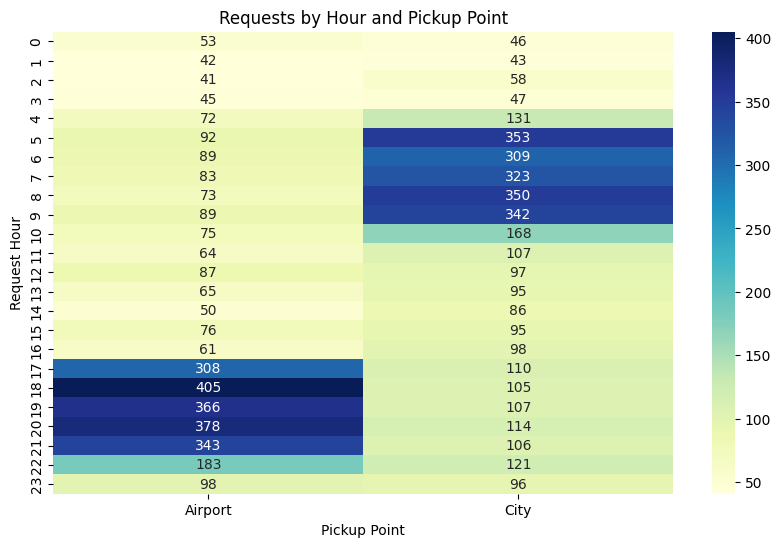

In [24]:
# Correlation Heatmap of Requests by Hour and Pickup Point
heatmap_data = df.groupby(['Request Hour', 'Pickup point']).size().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Requests by Hour and Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Request Hour")
plt.show()

##### 1. Why did you pick the specific chart?


*   A heatmap showing how many requests occur at each hour from both City and Airport.
*   It gives a compact view of high-demand combinations in time and location.


##### 2. What is/are the insight(s) found from the chart?

From the chart we can observe that:

*   Both City and Airport see high request counts between 5 AM to 9 AM and 5 PM to 9 PM.
*   These are clear rush hours, showing consistent high demand pressure.


#### Chart - 15 - Pair Plot

<Figure size 1000x600 with 0 Axes>

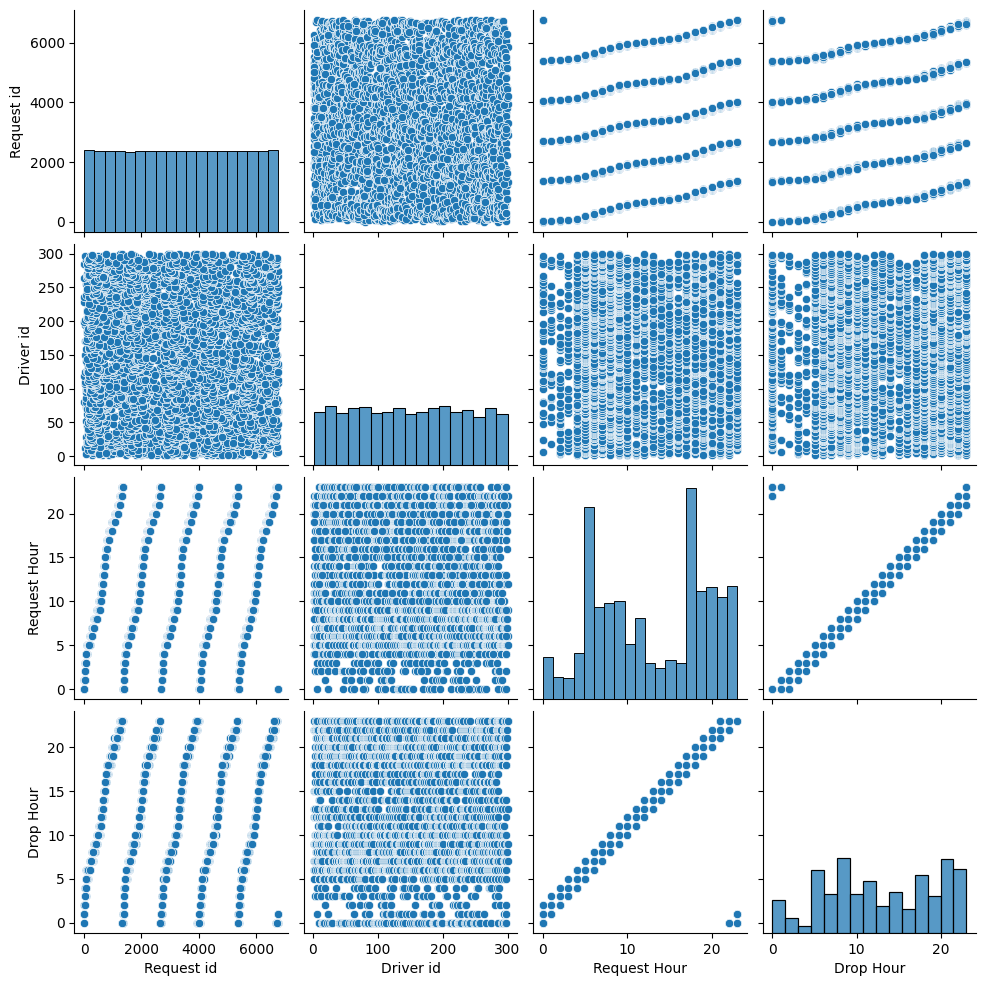

In [25]:
# Pair Plot visualization code
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?


*   The pair plot to visually explore the relationships between multiple numerical variables in the dataset.
*   It helps identify patterns, correlations, and clustering without needing complex statistical computations.
*   This is especially useful for detecting linear or non-linear relationships between features like Request Hour and Drop Hour.


##### 2. What is/are the insight(s) found from the chart?

From the charts we can observe that:


*   Trips that start in the morning hours tend to end within a similar timeframe, indicating short trips.
*   There is some clustering of data points during specific hours (e.g., rush hours), indicating concentrated usage.
*   No strong linear correlation is visible, but the plot confirms temporal usage patterns.

This supports the idea that most rides are short-distance, and that peak hours dominate both requests and completions.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

##### 1. **Dynamic Driver Allocation:**

*   Use hourly and location-based insights to deploy more drivers during peak hours, especially between 5–10 AM and 5–9 PM.
*   Focus on high-failure zones like the Airport (No Cars Available) and City (Cancellations).

##### 2. **Driver Incentive Programs:**

*   Offer peak-time incentives or bonuses to drivers during high-demand but low-availability slots (e.g., late night, early morning).
*   Use penalty reduction to discourage cancellations during critical hours.

##### 3. **Customer Notifications / Smart ETAs:**

*   Inform customers about expected delays or limited availability during congested hours to reduce frustration and increase transparency.

##### 4. **Surge Pricing Optimization:**

*   Apply surge pricing more intelligently, only when both demand is high and supply is critically low — especially at the Airport.

##### 5. **Data-Driven Scheduling:**

*   Use historical data (from this project) to build predictive models that inform future driver shifts and supply planning.

# **Conclusion**

This project aimed to identify and address the supply-demand gap in Uber ride requests using Excel, SQL, and Python-based EDA.

Through data cleaning, visualization, and analysis, we uncovered key patterns such as:


*   High demand during morning and evening rush hours
*   Frequent cancellations in the City, and no car availability at the Airport
*   A clear mismatch between request volume and trip completion, especially during peak hours

These insights suggest the need for targeted driver allocation, incentive structures, and data-driven scheduling to reduce failures and improve operational efficiency.

With the implementation of these recommendations, Uber can enhance customer satisfaction, reduce unmet demand, and ultimately increase revenue.